https://www.cs.ubc.ca/~lowe/papers/ijcv04.pdf

In [2]:
import numpy as np
import cv2 as cv

img = cv.imread('data/umn-hw2/Hyun_Soo_target1.jpg')

img.shape

(812, 1441, 3)

In [3]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

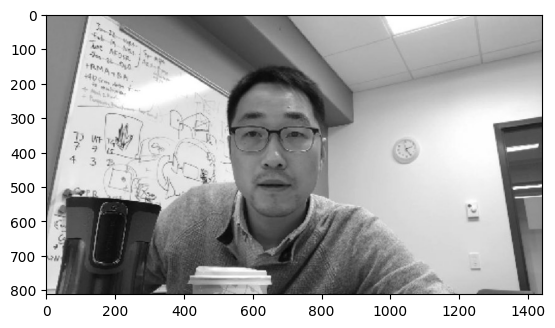

In [5]:
import matplotlib.pyplot as plt

plt.imshow(img, cmap=plt.get_cmap('gray'))

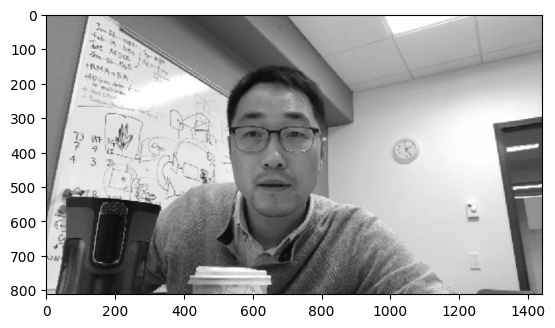

In [7]:
plt.imshow(gray, cmap=plt.get_cmap('gray'))

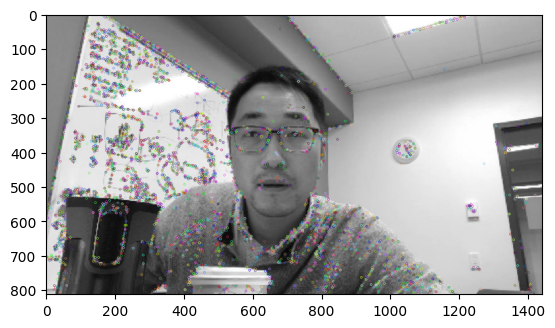

In [12]:
sift = cv.xfeatures2d.SIFT_create()
kp, des1 = sift.detectAndCompute(gray, None)

img = cv.drawKeypoints(gray, kp, img)
plt.imshow(img)

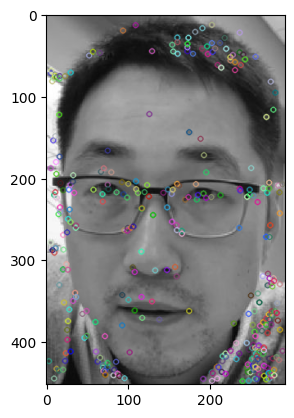

In [13]:
template_img = cv.imread('data/umn-hw2/Hyun_Soo_template.jpg')
template_gray = cv.cvtColor(template_img, cv.COLOR_BGR2GRAY)
template_kp, template_des = sift.detectAndCompute(template_gray, None)

plt.imshow(cv.drawKeypoints(template_gray, template_kp, template_img))

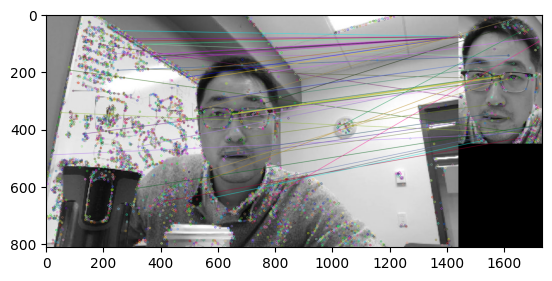

In [25]:
bf = cv.BFMatcher()
matches = bf.knnMatch(des1, template_des, k=2)

good = []
for m,n in matches:
    if m.distance < .7*n.distance:
        good.append(m)

img3 = cv.drawMatchesKnn(
    img1=img,
    keypoints1=kp,
    img2=template_img,
    keypoints2=template_kp,
    matches1to2=good,
    outImg=None,
    flags=2
)
plt.imshow(img3)


In [32]:
good.index


<function list.index(value, start=0, stop=9223372036854775807, /)>

In [44]:
good[0]

[< cv2.DMatch 0x7ff59669e750>]

In [35]:
A = cv.estimateAffine2D(
  np.float32([kp[m.queryIdx] for m in good]).reshape(-1, 1, 1),
  np.float32([template_kp[m.trainIdx] for m in good]).reshape(-1, -1, 1),
  # [kp[m].pt for m in good], 
  # [template_kp[m].pt for m in good], 
  good, cv.RANSAC, ransacReprojThreshold=3, maxIters=2000, confidence=.99, refineIters=10)

AttributeError: 'list' object has no attribute 'queryIdx'